In [47]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [48]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

df = X.join(y)

# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

display(df)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Show data info

In [49]:
print(df.info())
print(df.shape)

print(df.columns[df.isnull().any()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
(48842, 15)
Index(['workclass', 'occupation', 'native-country'], dtype='object')


## Cleaning Data

### Drop NA and duplicates

In [50]:
print(df.shape)

# drop rows with missing values
df = df.dropna()

print(df.shape)

# drop duplicates
df = df.drop_duplicates()

# drop redundant columns
df = df.drop('education', axis=1)

print(df.shape)

(48842, 15)
(47621, 15)
(47592, 14)


In [51]:
# Format column, get rid of variations
df['income'] = df['income'].replace('>50K.', '>50K')
df['income'] = df['income'].replace('<=50K.', '<=50K')

# Binarize column
df['income'] = np.where(df['income'] == '>50K', 1, 0)
df.rename(columns={'income':'income>50K'}, inplace=True)

display(df)

36053
11539


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


# Drop Categorical Features - df1

In [52]:
# Create copy dataframe and extract features and target
df1 = df.copy()
y1 = df1.iloc[:,-1:]
X1 = df1.iloc[:,1:-1]

# Drop all categorical columns
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X1 = X1.drop(categorical_cols, axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [54]:
# Create depth options
depth_range = range(1, 51)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate through the different tree depth options
for depth in depth_range:
    # Create a new decision tree with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the tree
    clf.fit(X_train, y_train)
    
    # Predict the training and test labels
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Compute the training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Compute the test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

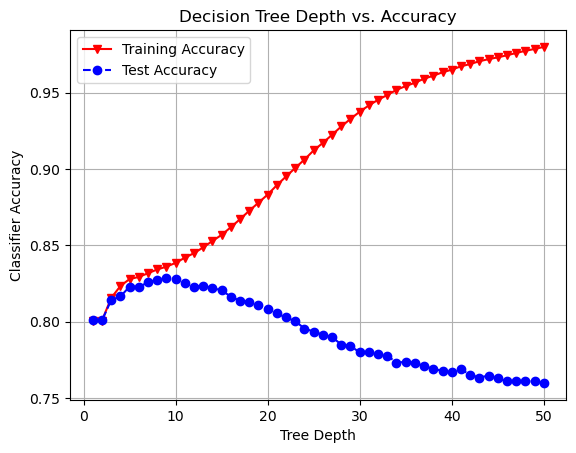

In [55]:
plt.plot(depth_range, train_accuracies, 'rv-', depth_range, test_accuracies, 'bo--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.grid(True)
plt.show()

In [56]:
# Create a new decision tree with the current depth
clf = DecisionTreeClassifier(max_depth=9, random_state=42)
    
# Train the tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

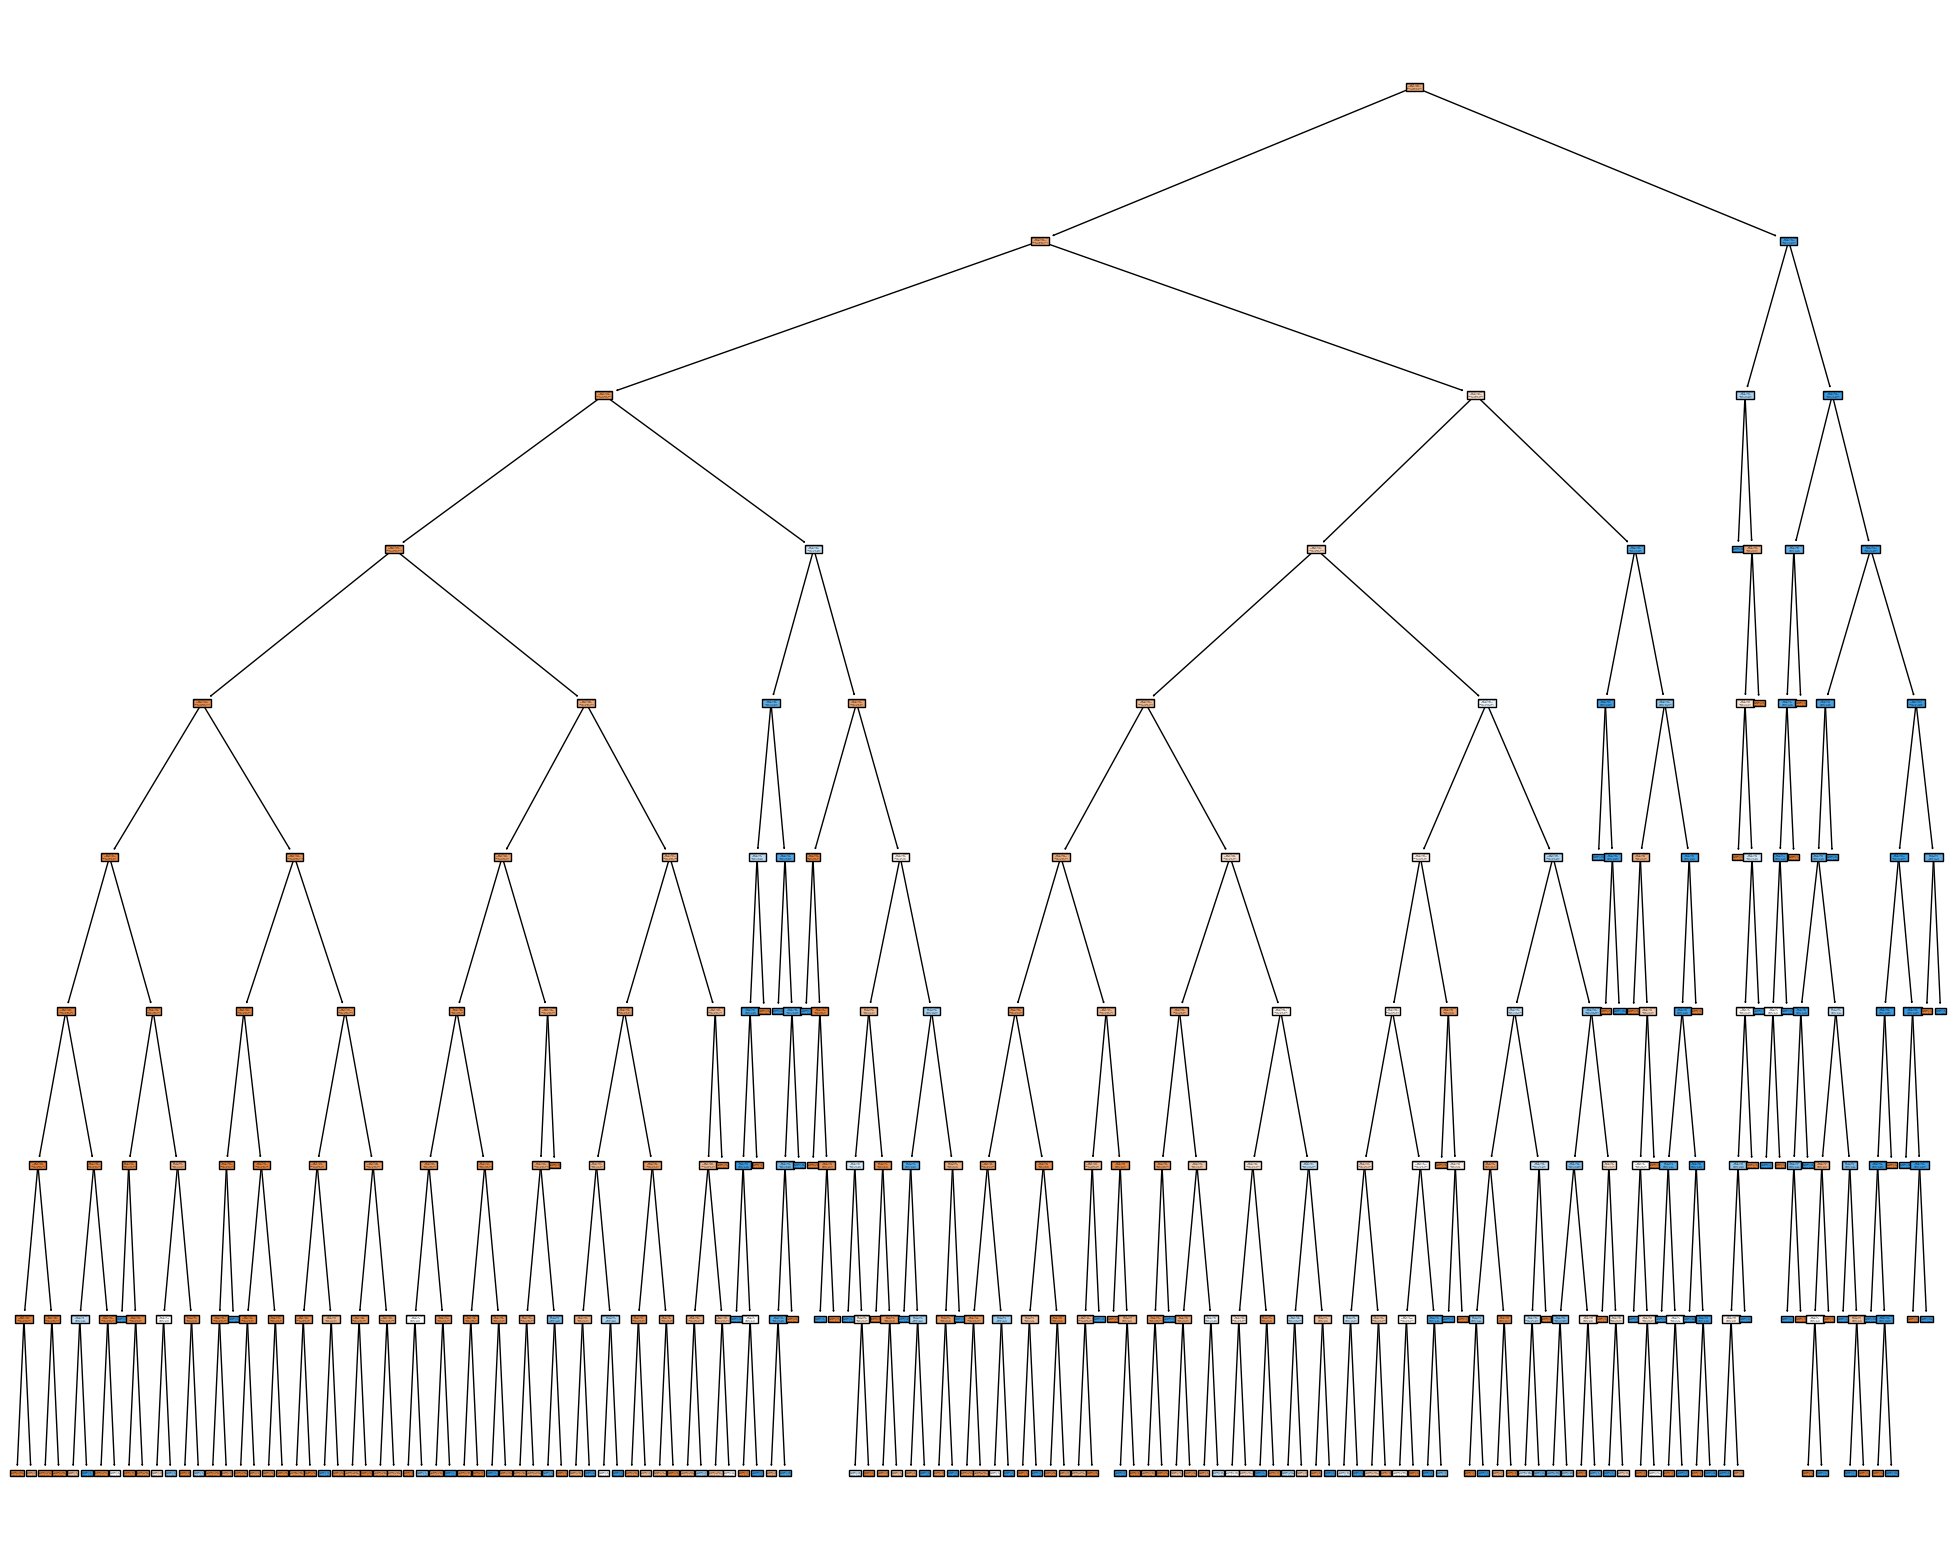

In [57]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['>50K', '<=50K'],
                   filled=True)
plt.show()

In [58]:
# Extract features and target
df2 = df.copy()
y2 = df2.iloc[:,-1:]
X2 = df2.iloc[:,1:-1]

# Create encoder
encoder = LabelEncoder()

# Encode categorical columns
X2['workclass'] = encoder.fit_transform(X2['workclass'])
X2['occupation'] = encoder.fit_transform(X2['occupation'])
X2['marital-status'] = encoder.fit_transform(X2['marital-status'])
X2['relationship'] = encoder.fit_transform(X2['relationship'])
X2['race'] = encoder.fit_transform(X2['race'])
X2['native-country'] = encoder.fit_transform(X2['native-country'])
X2['sex'] = encoder.fit_transform(X2['sex'])
display(X2)
display(y2)

,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,7,77516,13,4,1,1,4,1,2174,0,40,39
1,6,83311,13,2,4,0,4,1,0,0,13,39
2,4,215646,9,0,6,1,4,1,0,0,40,39
3,4,234721,7,2,6,0,2,1,0,0,40,39
4,4,338409,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,4,245211,13,4,10,3,4,1,0,0,40,39
48837,4,215419,13,0,10,1,4,0,0,0,36,39
48839,4,374983,13,2,10,0,4,1,0,0,50,39
48840,4,83891,13,0,1,3,1,1,5455,0,40,39


,income>50K
0,0
1,0
2,0
3,0
4,0
...,...
48836,0
48837,0
48839,0
48840,0


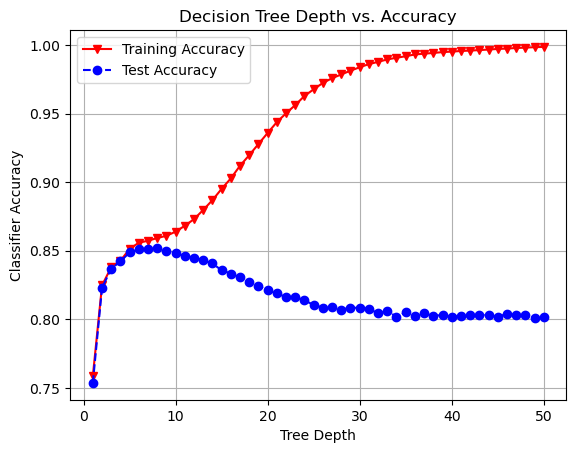

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create depth options
depth_range = range(1, 51)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate through the different tree depth options
for depth in depth_range:
    # Create a new decision tree with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the tree
    clf.fit(X_train, y_train)
    
    # Predict the training and test labels
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Compute the training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Compute the test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)



plt.plot(depth_range, train_accuracies, 'rv-', depth_range, test_accuracies, 'bo--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.grid(True)
plt.show()

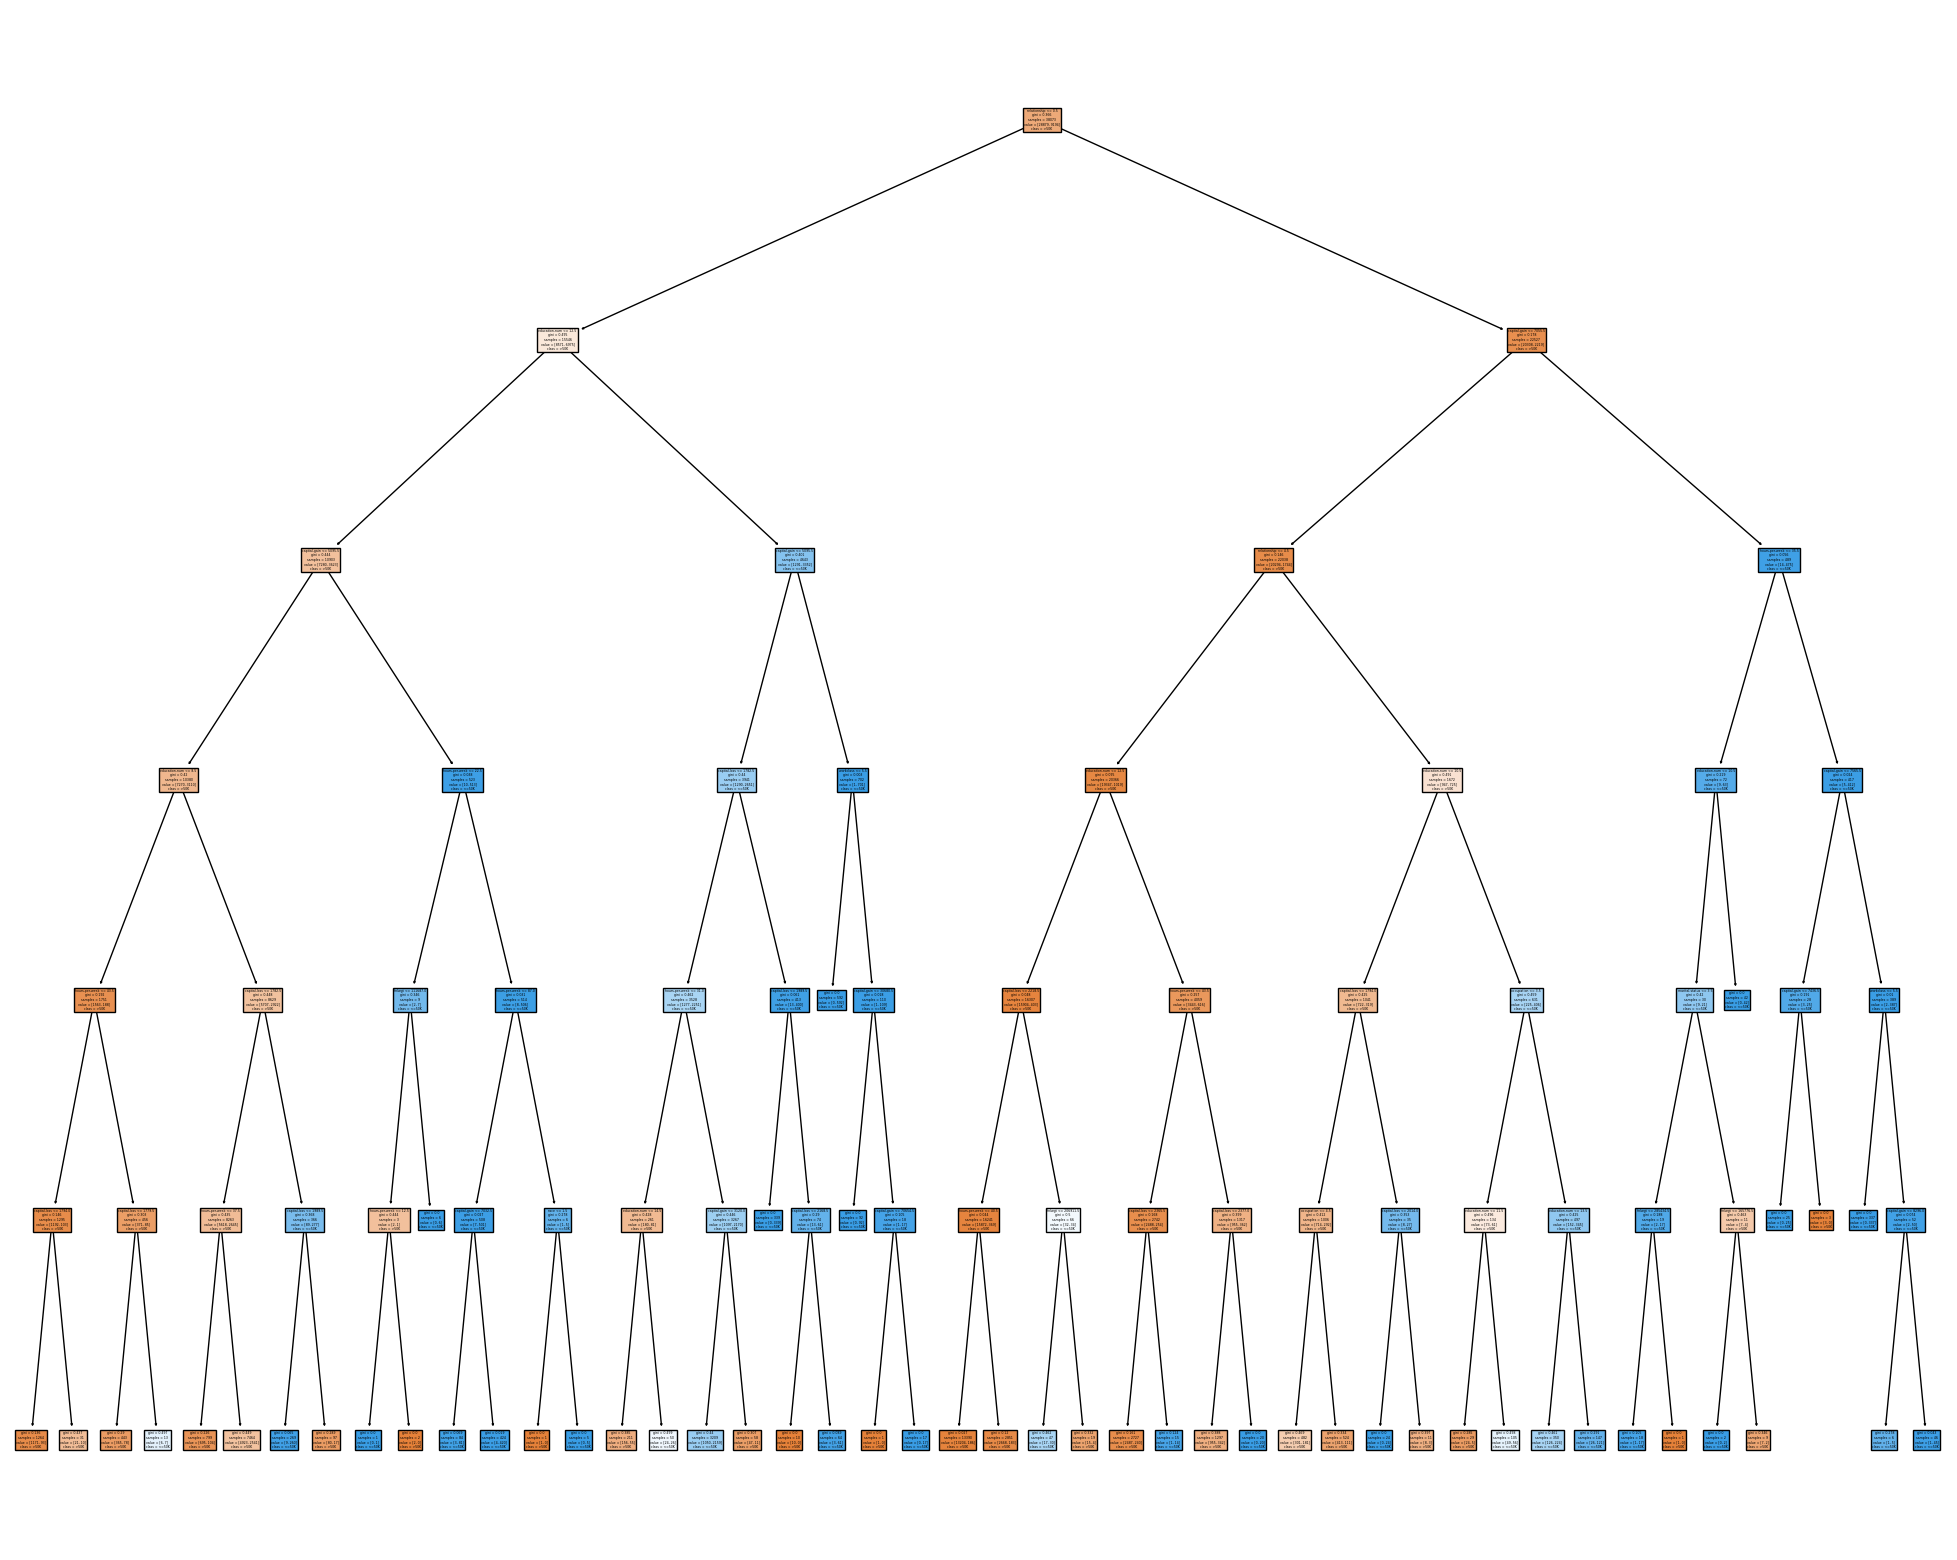

In [60]:
# Create a new decision tree with the current depth
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
    
# Train the tree
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['>50K', '<=50K'],
                   filled=True)
plt.show()

In [61]:
# Extract features and target
df3 = df.copy()
y3 = df3.iloc[:,-1:]
X3 = df3.iloc[:,1:-1]

# Create encoder
encoder = LabelEncoder()

# Encode categorical data
X3['occupation'] = encoder.fit_transform(X3['occupation'])
X3['relationship'] = encoder.fit_transform(X3['relationship'])
X3['race'] = encoder.fit_transform(X3['race'])
X3['native-country'] = encoder.fit_transform(X3['native-country'])
X3['sex'] = encoder.fit_transform(X3['sex'])
display(X3.iloc[:4,:])

# One hot encode categorical data - marital-status
X3['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married', inplace=True)
X3['marital-status'].replace(['Divorced', 'Separated', 'Widowed'], 'Divorced', inplace=True)
X3 = pd.get_dummies(X3, columns=['marital-status'], dtype=int)
display(X3.iloc[:4,:])

# One hot encode categorical data - workclass
X3['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'self-emp', inplace=True)
X3['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'government', inplace=True)
X3['workclass'].replace(['Never-worked', 'Without-pay'], 'jobless', inplace=True)

X3 = pd.get_dummies(X3, columns=['workclass'], dtype=int)

display(X3.iloc[:4,:])


,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,State-gov,77516,13,Never-married,1,1,4,1,2174,0,40,39
1,Self-emp-not-inc,83311,13,Married-civ-spouse,4,0,4,1,0,0,13,39
2,Private,215646,9,Divorced,6,1,4,1,0,0,40,39
3,Private,234721,7,Married-civ-spouse,6,0,2,1,0,0,40,39


,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,marital-status_Divorced,marital-status_Married,marital-status_Never-married
0,State-gov,77516,13,1,1,4,1,2174,0,40,39,0,0,1
1,Self-emp-not-inc,83311,13,4,0,4,1,0,0,13,39,0,1,0
2,Private,215646,9,6,1,4,1,0,0,40,39,1,0,0
3,Private,234721,7,6,0,2,1,0,0,40,39,0,1,0


,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,marital-status_Divorced,marital-status_Married,marital-status_Never-married,workclass_?,workclass_Private,workclass_government,workclass_jobless,workclass_self-emp
0,77516,13,1,1,4,1,2174,0,40,39,0,0,1,0,0,1,0,0
1,83311,13,4,0,4,1,0,0,13,39,0,1,0,0,0,0,0,1
2,215646,9,6,1,4,1,0,0,40,39,1,0,0,0,1,0,0,0
3,234721,7,6,0,2,1,0,0,40,39,0,1,0,0,1,0,0,0


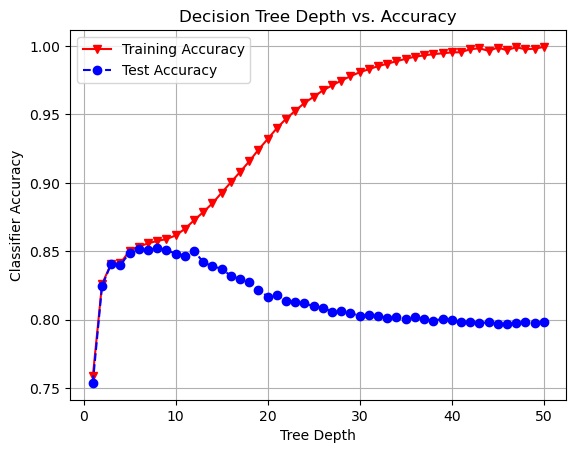

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create depth options
depth_range = range(1, 51)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate through the different tree depth options
for depth in depth_range:
    # Create a new decision tree with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the tree
    clf.fit(X_train, y_train)
    
    # Predict the training and test labels
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Compute the training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Compute the test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)



plt.plot(depth_range, train_accuracies, 'rv-', depth_range, test_accuracies, 'bo--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.grid(True)
plt.show()

In [63]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    
# Train the tree
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

# Print feature names and their importance scores
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

fnlwgt: 0.0
education-num: 0.24386114396769168
occupation: 0.0
relationship: 0.0003380130447828536
race: 0.0
sex: 0.0
capital-gain: 0.219506264679455
capital-loss: 0.05823714660807364
hours-per-week: 0.022294183624070603
native-country: 0.0
marital-status_Divorced: 0.00034450852304000317
marital-status_Married: 0.4554187395528862
marital-status_Never-married: 0.0
workclass_?: 0.0
workclass_Private: 0.0
workclass_government: 0.0
workclass_jobless: 0.0
workclass_self-emp: 0.0
